In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [16]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [17]:
print("=" * 60)
print("CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING")
print("=" * 60)

CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING


In [18]:
print("\n[STEP 1] Loading Dataset...")


[STEP 1] Loading Dataset...


In [19]:
np.random.seed(42)
data = {
    'CustomerID': range(1, 201),
    'Gender': np.random.choice(['Male', 'Female'], 200),
    'Age': np.random.randint(18, 70, 200),
    'Annual Income (k$)': np.random.randint(15, 140, 200),
    'Spending Score (1-100)': np.random.randint(1, 100, 200)
}
df = pd.DataFrame(data)

In [20]:
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Dataset loaded successfully!
Shape: (200, 5)

First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  68                      86
1           2  Female   56                  22                      57
2           3    Male   66                  41                      29
3           4    Male   69                  41                      78
4           5    Male   49                 112                      92


In [21]:
print("\n" + "=" * 60)
print("[STEP 2] Data Exploration")
print("=" * 60)


[STEP 2] Data Exploration


In [22]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int32 
 3   Annual Income (k$)      200 non-null    int32 
 4   Spending Score (1-100)  200 non-null    int32 
dtypes: int32(3), int64(1), object(1)
memory usage: 5.6+ KB
None


In [23]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   44.405000           77.035000               49.800000
std     57.879185   15.353816           36.558397               29.454846
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   32.750000           44.000000               23.750000
50%    100.500000   46.000000           74.000000               48.500000
75%    150.250000   56.000000          111.000000               75.250000
max    200.000000   69.000000          139.000000               99.000000


In [24]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


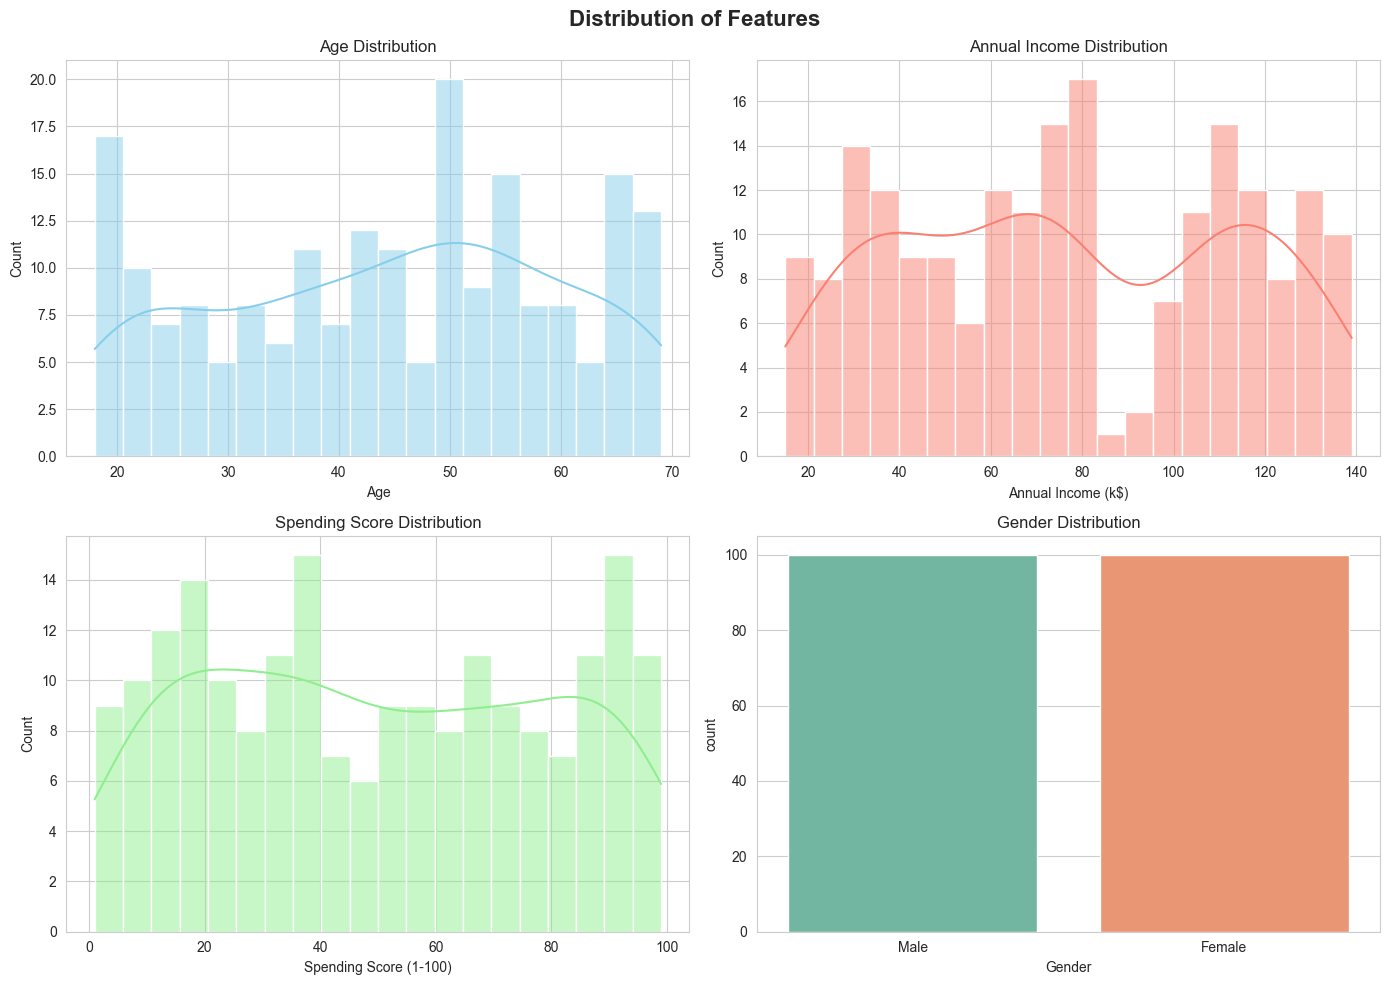

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Features', fontsize=16, fontweight='bold')

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Spending Score Distribution')

sns.countplot(data=df, x='Gender', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

In [26]:
print("\n" + "=" * 60)
print("[STEP 3] Data Preprocessing")
print("=" * 60)


[STEP 3] Data Preprocessing


In [27]:
df_clean = df.dropna()
print(f"Rows after handling missing values: {len(df_clean)}")

Rows after handling missing values: 200


In [28]:
X = df_clean[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(f"\nFeatures selected for clustering:")
print("- Annual Income (k$)")
print("- Spending Score (1-100)")


Features selected for clustering:
- Annual Income (k$)
- Spending Score (1-100)


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData normalized using StandardScaler")


Data normalized using StandardScaler


In [30]:
print("\n" + "=" * 60)
print("[STEP 4] Finding Optimal Number of Clusters")
print("=" * 60)


[STEP 4] Finding Optimal Number of Clusters


In [31]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

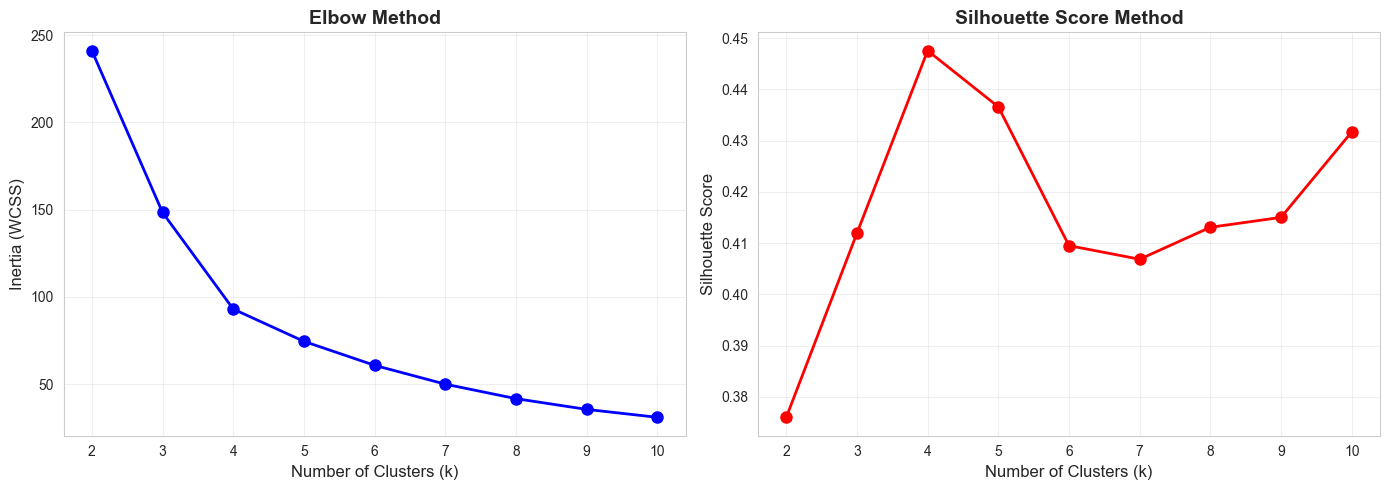

Based on the Elbow Method, optimal k appears to be around 4-5 clusters


In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score Method', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("Based on the Elbow Method, optimal k appears to be around 4-5 clusters")


In [33]:
print("\n" + "=" * 60)
print("[STEP 5] Applying K-Means Clustering")
print("=" * 60)


[STEP 5] Applying K-Means Clustering


In [34]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"K-Means clustering applied with k={optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, df_clean['Cluster']):.3f}")

# Cluster distribution
print("\nCluster Distribution:")
print(df_clean['Cluster'].value_counts().sort_index())

K-Means clustering applied with k=5
Silhouette Score: 0.437

Cluster Distribution:
Cluster
0    51
1    40
2    48
3    35
4    26
Name: count, dtype: int64



[STEP 6] Visualizing Clusters


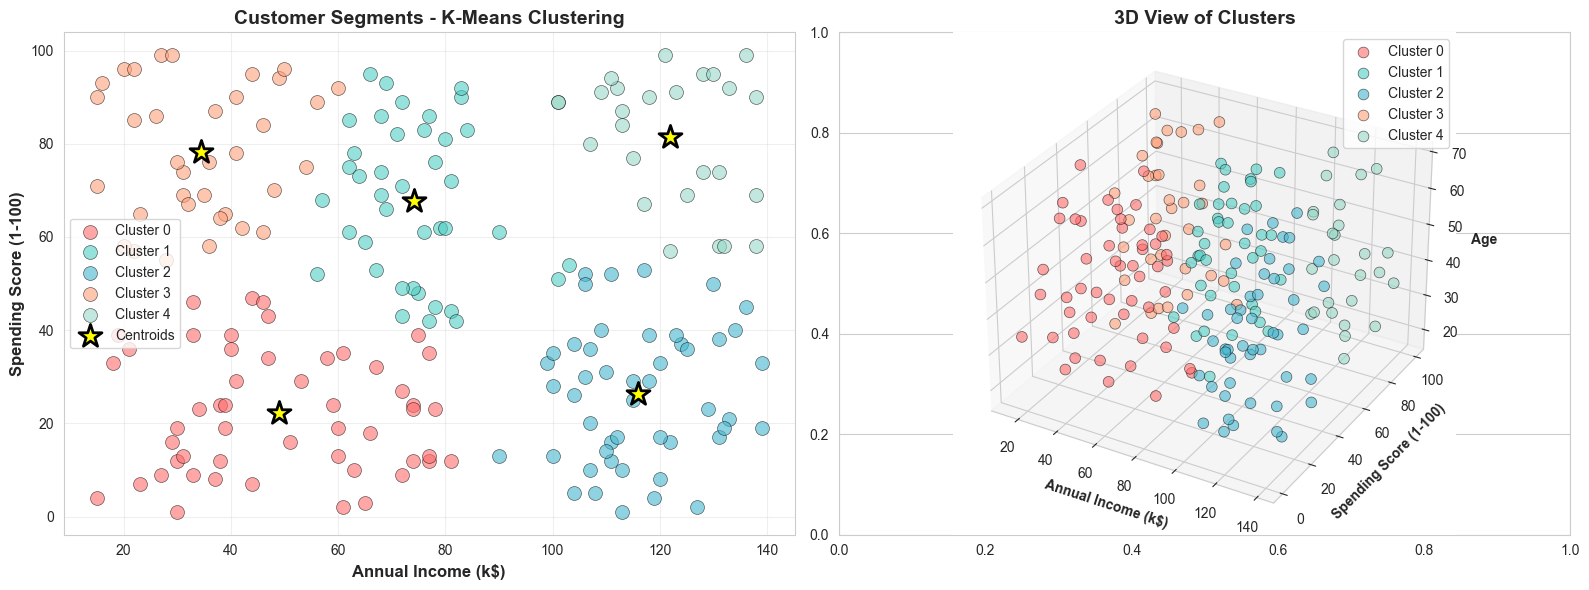

In [35]:
print("\n" + "=" * 60)
print("[STEP 6] Visualizing Clusters")
print("=" * 60)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Clusters with centroids
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
for i in range(optimal_k):
    cluster_data = df_clean[df_clean['Cluster'] == i]
    axes[0].scatter(
        cluster_data['Annual Income (k$)'], 
        cluster_data['Spending Score (1-100)'],
        s=100, 
        c=colors[i], 
        label=f'Cluster {i}',
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
axes[0].scatter(
    centroids[:, 0], 
    centroids[:, 1],
    s=300, 
    c='yellow', 
    marker='*',
    edgecolors='black',
    linewidth=2,
    label='Centroids',
    zorder=10
)
axes[0].set_xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
axes[0].set_title('Customer Segments - K-Means Clustering', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(122, projection='3d')

for i in range(optimal_k):
    cluster_data = df_clean[df_clean['Cluster'] == i]
    ax.scatter(
        cluster_data['Annual Income (k$)'], 
        cluster_data['Spending Score (1-100)'],
        cluster_data['Age'],
        s=60,
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )

ax.set_xlabel('Annual Income (k$)', fontweight='bold')
ax.set_ylabel('Spending Score (1-100)', fontweight='bold')
ax.set_zlabel('Age', fontweight='bold')
ax.set_title('3D View of Clusters', fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()


[STEP 7] Cluster Analysis & Insights

Cluster Statistics:
         Avg Age  Avg Income (k$)  Avg Spending Score  Customer Count
Cluster                                                              
0          47.04            49.04               22.31              51
1          44.18            74.08               67.62              40
2          42.48           115.94               26.21              48
3          43.51            34.49               78.31              35
4          44.35           121.96               81.46              26

CLUSTER INTERPRETATIONS

Cluster 0: Low Income, Low Spending
  - Average Age: 47.0 years
  - Average Income: $49.0k
  - Average Spending Score: 22.3/100
  - Customer Count: 51
  - Profile: Budget-conscious - Low income, low spending

Cluster 1: Low Income, High Spending
  - Average Age: 44.2 years
  - Average Income: $74.1k
  - Average Spending Score: 67.6/100
  - Customer Count: 40
  - Profile: Careful monitoring - Low income but high spending (

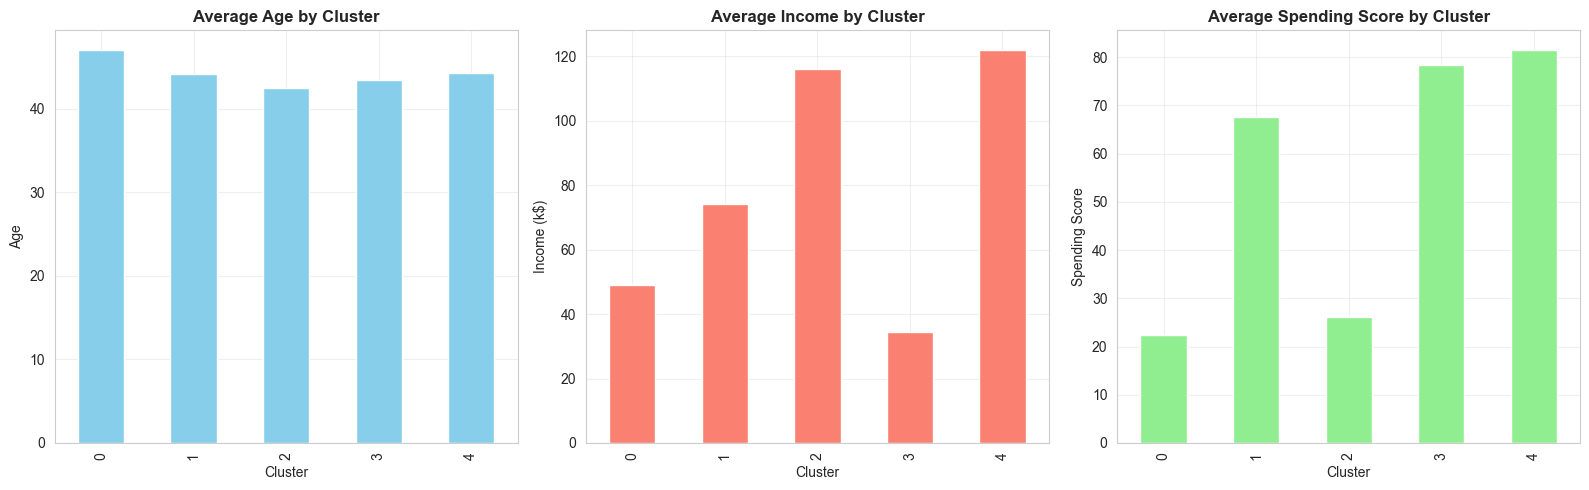

In [37]:
print("\n" + "=" * 60)
print("[STEP 7] Cluster Analysis & Insights")
print("=" * 60)

# Calculate cluster statistics
cluster_stats = df_clean.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).round(2)
cluster_stats.columns = ['Avg Age', 'Avg Income (k$)', 'Avg Spending Score', 'Customer Count']

print("\nCluster Statistics:")
print(cluster_stats)

# Interpretation
print("\n" + "=" * 60)
print("CLUSTER INTERPRETATIONS")
print("=" * 60)

interpretations = []
for i in range(optimal_k):
    stats = cluster_stats.loc[i]
    income_level = "High" if stats['Avg Income (k$)'] > df_clean['Annual Income (k$)'].mean() else "Low"
    spending_level = "High" if stats['Avg Spending Score'] > df_clean['Spending Score (1-100)'].mean() else "Low"
    
    interpretation = f"""
Cluster {i}: {income_level} Income, {spending_level} Spending
  - Average Age: {stats['Avg Age']:.1f} years
  - Average Income: ${stats['Avg Income (k$)']:.1f}k
  - Average Spending Score: {stats['Avg Spending Score']:.1f}/100
  - Customer Count: {int(stats['Customer Count'])}
  - Profile: """
    
    if income_level == "High" and spending_level == "High":
        interpretation += "Target customers - High value, high spending"
    elif income_level == "High" and spending_level == "Low":
        interpretation += "Potential targets - High income but cautious spenders"
    elif income_level == "Low" and spending_level == "High":
        interpretation += "Careful monitoring - Low income but high spending (credit?)"
    else:
        interpretation += "Budget-conscious - Low income, low spending"
    
    print(interpretation)
    interpretations.append(interpretation)

# Visualize cluster profiles
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

cluster_stats.plot(kind='bar', y='Avg Age', ax=axes[0], color='skyblue', legend=False)
axes[0].set_title('Average Age by Cluster', fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Age')
axes[0].grid(True, alpha=0.3)

cluster_stats.plot(kind='bar', y='Avg Income (k$)', ax=axes[1], color='salmon', legend=False)
axes[1].set_title('Average Income by Cluster', fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Income (k$)')
axes[1].grid(True, alpha=0.3)

cluster_stats.plot(kind='bar', y='Avg Spending Score', ax=axes[2], color='lightgreen', legend=False)
axes[2].set_title('Average Spending Score by Cluster', fontweight='bold')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Spending Score')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

